<img src="https://www.nationalgeographic.com.es/medio/2022/11/02/cambio-climatico-antropogenico_4253f323_1280x900.jpg"/>

# MBIT School

## Trabajo de Final de Máster

---
Unai González (unaixgonza@gmail.com)

Jesús Tejedo (jesus.tejedolopez@gmail.com)

Francisca Rubio (franciscarubio28@gmail.com)

Carlos Valentí (carlosvalenti28@gmail.com)

---

### a) Carga de datos y primera visualización

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [2]:
# Cargamos los datos
df = pd.read_parquet('all_data.parquet')

In [3]:
# Visualizamos de las primeras filas
# df.head()

### b) Exploración de los datos

In [4]:
# Comprobamos las filas y columnas
rows, cols = df.shape
display(HTML(f'''El conjunto de entrenamiento tiene un total de <b>{rows}</b> filas y <b>{cols}</b> columnas.<br>
Los nombres de las columnas son:'''))
print(f'{df.columns}')

Index(['fecha', 'indicativo', 'nombre', 'provincia', 'altitud', 'tmed', 'prec',
       'tmin', 'horatmin', 'tmax', 'horatmax', 'sol', 'presMax', 'horaPresMax',
       'presMin', 'horaPresMin', 'velmedia', 'dir', 'racha', 'horaracha'],
      dtype='object')


#### b) II. Naturaleza de los datos

Comprobamos que todos los datos vienen en formato ***"string"***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209415 entries, 0 to 226946
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   fecha        209415 non-null  string
 1   indicativo   209415 non-null  string
 2   nombre       209415 non-null  string
 3   provincia    209415 non-null  string
 4   altitud      209415 non-null  string
 5   tmed         209415 non-null  string
 6   prec         209415 non-null  string
 7   tmin         209415 non-null  string
 8   horatmin     206493 non-null  string
 9   tmax         209415 non-null  string
 10  horatmax     206493 non-null  string
 11  sol          139876 non-null  string
 12  presMax      136954 non-null  string
 13  horaPresMax  136954 non-null  string
 14  presMin      136954 non-null  string
 15  horaPresMin  136954 non-null  string
 16  velmedia     201193 non-null  string
 17  dir          183814 non-null  string
 18  racha        183814 non-null  string
 19  horarac

 **Las columnas tienen los siguientes significados:**
- ***fecha:*** La fecha en la que se registraron los datos.
- ***indicativo:*** Un identificador numérico para la estación meteorológica.
- ***nombre:*** El nombre de la estación meteorológica.
- ***provincia:*** La provincia donde se encuentra la estación meteorológica.
- ***altitud***: La altitud de la estación meteorológica en metros sobre el nivel del mar.
- ***tmed***: La temperatura media registrada en °C.
- ***prec:*** La cantidad de precipitación registrada en mm (1 mm = 1 l/m2)
- ***tmin:*** La temperatura mínima registrada en °C.
- ***horatmin:*** La hora en la que se registró la temperatura mínima.
- ***tmax***: La temperatura máxima registrada en °C.
- ***horatmax:*** La hora en la que se registró la temperatura máxima.
- ***sol:*** Las horas de sol registradas.
- ***presMax:*** La presión máxima registrada en hPa.
- ***horaPresMax:*** La hora en la que se registró la presión máxima.
- ***presMin:*** La presión mínima registrada en hPa.
- ***horaPresMin:*** La hora en la que se registró la presión mínima.
- ***velmedia:*** La velocidad media del viento registrada en m/s.
- ***dir:*** La dirección del viento registrada.
- ***racha:*** La velocidad máxima de la ráfaga de viento registrada en m/s.
- ***horaracha:*** La hora en la que se registró la velocidad máxima de la ráfaga de viento.

Realizamos un pequeño análisis estadístico para comprobar la distribucción de las variables

In [6]:
# Forzamos a que se incluyan las columnas de tipo 'string'
df.describe(include='string')

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,sol,presMax,horaPresMax,presMin,horaPresMin,velmedia,dir,racha,horaracha
count,209415,209415,209415,209415,209415,209415,209415,209415,206493,209415,206493,139876,136954,136954,136954,136954,201193,183814,183814,183814
unique,27759,16,16,3,14,404,877,385,987,490,851,148,1201,63,1324,63,75,77,146,1478
top,2016-11-06,8025,ALACANT/ALICANTE,VALENCIA,11,None,"0,0",None,23:59,None,14:00,"0,0",None,00,None,18,"1,9",nan,None,None
freq,15,27759,27759,99014,34531,4495,159422,4493,13122,4484,11745,6144,4160,29124,4167,14439,18102,10983,10983,11013


#### b) III. Valores únicos, nulos y duplicados

 - **Valores únicos**

In [7]:
# Definimos una función que nos devueva todos los valores únicos
def nunique_values(DataFrame):
    for col in df.columns:
        n_values = df[col].nunique()
        display(HTML(f'''- <b>{col}</b> tiene un total de <b>{n_values}</b> valores únicos'''))

In [8]:
display(HTML('<b>Valores faltantes en "df" por columnas:<b>'))
nunique_values(df)

Comprobamos las distintas localizaciones que hay en ***'df'***

In [9]:
# Comprobamos los valores de la columna 'provincia'
province = df.provincia.unique()
display(HTML('<b>Tenemos las Provincias de:<b>'))
for prov in province:
    print(f'- {prov}')

# Comprobamos los valores de la columna 'nombre'
display(HTML(f'<b>Estaciones metereológicas:<b>'))
station = df.nombre.unique()
for state in station:
    print(f'- {state}')

- ALICANTE
- CASTELLON
- VALENCIA


- ALICANTE-ELCHE AEROPUERTO
- ALACANT/ALICANTE
- JÁVEA/ XÀBIA
- EL PINÓS/PINOSO
- CASTELLÓ - ALMASSORA
- CASTELLFORT
- CASTELLÓ DE LA PLANA
- VILLAFRANCA DEL CID/VILLAFRANCA
- VINARÒS
- VALENCIA AEROPUERTO
- VALÈNCIA
- OLIVA
- POLINYÀ DE XÚQUER
- UTIEL
- VALÈNCIA, VIVEROS
- XÀTIVA


 - **Valores nulos**

In [10]:
# Comprobamos cuántos valores nulos tenemos en cada columna
def missing_values(DataFrame):
    for col in df.columns:
        mv_absolute = df[col].isnull().sum()
        mv_relative = df[col].isnull().sum()*100/len(df)
        mv_relative = round(mv_relative, 2) # Redondeamos la salida a dos decimales
        display(HTML(f'- <b>{col}</b> tiene <b>{mv_absolute}</b> valores nulos, un <b>{mv_relative}%</b>.'))

In [11]:
display(HTML('<b>Valores nulos en "df" por columnas:<b>'))
missing_values(df)

Comprobamos cuantas filas tienen al menos un valor nulo y el total de los valores faltantes para situarnos.

In [12]:
# Comprobamos las filas con al menos un valor nulo
rows_null = df.isnull().any(axis=1).sum() # Filas con al menos un valor nulo
rows_null_min = (rows_null/df.shape[0])*100 # 'rows_null' entre el número de filas
rows_null_min = round(rows_null_min, 2) # Redondeo a dos decimales

display(HTML(f'- Tenemos un total de <b>{df.shape[0]}</b> filas de las cuales <b>{rows_null}</b> tienen al menos un valor nulo, el <b>{rows_null_min}%</b> de las filas de <b>"df"</b>'))

# Comprobamos el total de valores faltantes
total_vol = np.product(df.shape) # Multiplicamos filas por columnas para obtener el total de valores/datos
missing_vol = df.isnull().sum().sum() # Sumamos dos veces para obtener el total de nulos
missing_vol_round = round(missing_vol/total_vol, 2)*100 # Redondeo a dos decimales

display(HTML(f"- De los <b>{total_vol}</b> valores tenemos que <b>{missing_vol}</b> son nulos, el <b>{missing_vol_round}%</b> de los datos"))

 - **Valores duplicados**

In [13]:
# Definimos función que nos diga cuántos valores duplicados tenemos, si los hubiera
def duplicated(DataFrame):
    if df.duplicated().sum() == 0:
        print('No hay valores duplicados en el DataFrame')
    else:
        print(f'Hay {df.duplicated().sum()} en nuestro DataFrame')

In [14]:
duplicated(df)

No hay valores duplicados en el DataFrame


### c) Procesado de los datos

Comenzamos por la columna fecha porque es la más importante para ordenar cronológicamente los datos

#### c) I. Transformación de variables al formato correspondiente

In [15]:
# Transformamos la columna 'fecha' a formato fecha
df['fecha'] = pd.to_datetime(df['fecha'])

In [16]:
# Ordenamos el DataFrame por la columna 'fecha'
df.sort_values(by='fecha', ascending=True, inplace=True)

# Reseteamos el índice para que se reordene por la columna 'fecha'
df.reset_index(drop=True, inplace=True)

In [17]:
# Comprobamos los años 
unique_years = df['fecha'].dt.year.unique()

# Obtenemos el primer y último año de la columna 'fecha'
first_year = unique_years[0]
last_year = unique_years[-1]

display(HTML(f'''EL DataFrame guarda información metereológica de <b>{len(unique_years)} años</b> de la <b>Comunidad Valenciana</b>.<br>
Desde el año <b>{first_year}</b> hasta el año <b>{last_year}</b><br>
Lista de los años:'''))
print(unique_years)

[1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961
 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022 2023]


Observamos que nuestro DataFrame tiene un hitórico de datos desde el año 1948 hasta el año 2023

#### c) II. En el proceso nos encontramos con valores extraños que dan error ('Ip' y 'Acum') en la columna 'prec'

Al ir a trnasformar a tipo numérico las columnas correspondientes a ese formnato nos salta un error. Tenemos valores no numéricos en las columans numéricas:
 - 'Ip'
 - 'Acum'

- **El caso 'Ip' de la columna 'prec'**

In [18]:
# Contamos las veces que se repite el valor 'Ip'
ip_reps = (df == 'Ip').sum().sum()
print(f'El valor "Ip" se repite un total de {ip_reps} veces')

El valor "Ip" se repite un total de 7465 veces


In [19]:
# Buscamos los índices de las filas dónde aparezca el valor 'Ip'
i_ip = np.where((df == 'Ip').any(axis=1))[0]

In [20]:
# Seleccionamos una muestra aleatoria de 5 índices que contengan el valor 'Ip' para comprobar qué puede ser
rows_ip = np.random.choice(i_ip, size=5)
ip_sample = df.iloc[rows_ip]
ip_sample

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,sol,presMax,horaPresMax,presMin,horaPresMin,velmedia,dir,racha,horaracha
38627,1975-11-12,8019,ALICANTE-ELCHE AEROPUERTO,ALICANTE,43,"16,3",Ip,"11,8",07:00,"20,8",13:10,"2,2","1017,3",09,"1015,6",15,"1,4",23.0,"10,3",11:29
66731,1992-06-07,8414A,VALENCIA AEROPUERTO,VALENCIA,56,"18,7",Ip,"11,4",05:30,"26,0",13:30,"8,9","1006,2",00,"1001,5",17,"5,0",24,"13,9",11:50
170550,2016-03-22,8414A,VALENCIA AEROPUERTO,VALENCIA,56,"14,5",Ip,"9,6",02:44,"19,4",13:29,"1,7","1001,8",00,"996,7",17,"3,3",99.0,"9,2",Varias
88681,1998-07-14,8414A,VALENCIA AEROPUERTO,VALENCIA,56,"25,6",Ip,"23,6",23:55,"27,7",15:40,"9,8","1008,2",24,"1004,7",01,"3,6",10,"9,4",09:35
16149,1962-11-17,8501,CASTELLÓ DE LA PLANA,CASTELLON,23,"12,4",Ip,"6,1",04:20,"18,8",12:35,"8,8","1012,7",0,"1002,8",16,"1,1",<NA>,<NA>,<NA>


Puesto que no llegamos a ninguna conclusión comprobando datos en las fechas cercanas que nos puedan explicar el significado buscamos esa información en internet.

Al buscar su significado encontramos que significa 'precipitación inapreciable', inferior a 0,1mm.

Por este motivo procedemos a cambiar todos los valores 'Ip' por el valor 0,05.

In [21]:
# Cambiamos los valores 'Ip' por el valor '0.05' en la columna 'prec'.
# Recordemos que estamos trabajando con datos del tipo 'str' por lo que todo debe ir entre comillas
df.prec.replace('Ip', '0.05', inplace=True)

 - **El caslo 'Acum' de la columna 'prec'**

In [22]:
# Contamos las veces que se repite el valor 'Acum'
acum_reps = (df == 'Acum').sum().sum()
print(f'El valor "Acum" se repite un total de {acum_reps} veces')

El valor "Acum" se repite un total de 4 veces


In [23]:
# Buscamos los índices de las filas dónde aparezca el valor 'Acum'
i_acum = np.where((df == 'Acum').any(axis=1))[0]

# Como solo se repite en 4 filas muestro todas las filas con 'Acum'
acum = df.iloc[i_acum]
acum

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,sol,presMax,horaPresMax,presMin,horaPresMin,velmedia,dir,racha,horaracha
119716,2005-09-06,8416,VALÈNCIA,VALENCIA,11,"24,6",Acum,"21,4",None,"27,8",None,None,None,None,None,None,None,nan,None,None
121353,2006-01-06,8416,VALÈNCIA,VALENCIA,11,"10,5",Acum,"7,2",None,"13,8",None,None,None,None,None,None,None,nan,None,None
121355,2006-01-07,8416,VALÈNCIA,VALENCIA,11,"11,0",Acum,"8,6",None,"13,4",None,None,None,None,None,None,None,nan,None,None
121378,2006-01-08,8416,VALÈNCIA,VALENCIA,11,"10,8",Acum,"7,0",None,"14,6",None,None,None,None,None,None,None,nan,None,None


En este caso no encontramos signinficado al dato no númerico 'Acum'. Por los que tenemos que realizar un estudio más completo de lo que rodea a este valor.

Comprobamos que solo aparece el valor 'Acum' en la columna 'prec' en el indicativo 8416 un total de 4 veces

La primera vez que aparece el valor 'Acum' en la columna 'prec' es el 06/09/2005 en el indicativo 8416. 

Procedemos a comprobar que sucedió el día anterior y posterior en ese indicativo

In [24]:
# Día anterior
df.loc[(df['fecha'] == '2005-09-05') & (df['indicativo'] == '8416')]

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,sol,presMax,horaPresMax,presMin,horaPresMin,velmedia,dir,racha,horaracha
119705,2005-09-05,8416,VALÈNCIA,VALENCIA,11,"26,0","0,0","22,2",None,"29,7",None,None,None,None,None,None,None,nan,None,None


In [25]:
# Día posterior
df.loc[(df['fecha'] == '2005-09-07') & (df['indicativo'] == '8416')]

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,sol,presMax,horaPresMax,presMin,horaPresMin,velmedia,dir,racha,horaracha
119731,2005-09-07,8416,VALÈNCIA,VALENCIA,11,"20,4","14,7","16,9",None,"23,9",None,None,None,None,None,None,None,nan,None,None


Para la fecha '2005-09-06':
 - Comprobamos que el día anterior es un día normal.
 - Comprobamos que tenemos un aumento significativo en las precipitaciones y una disminución significativa en las temperaturas de casi 6 grados para el días posterior.

Creamos un DataFrame con el indicativo número 8416 a ver qué le sucede de una forma más sencilla.

In [26]:
df_8416 = df[df['indicativo']=='8416']

In [27]:
df_8416.loc[(df_8416['fecha'] > '2006-01-04') & (df_8416['fecha'] < '2006-01-12')]

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,sol,presMax,horaPresMax,presMin,horaPresMin,velmedia,dir,racha,horaracha
121332,2006-01-05,8416,VALÈNCIA,VALENCIA,11,"11,1","0,0","6,2",None,"16,0",None,None,None,None,None,None,None,nan,None,None
121353,2006-01-06,8416,VALÈNCIA,VALENCIA,11,"10,5",Acum,"7,2",None,"13,8",None,None,None,None,None,None,None,nan,None,None
121355,2006-01-07,8416,VALÈNCIA,VALENCIA,11,"11,0",Acum,"8,6",None,"13,4",None,None,None,None,None,None,None,nan,None,None
121378,2006-01-08,8416,VALÈNCIA,VALENCIA,11,"10,8",Acum,"7,0",None,"14,6",None,None,None,None,None,None,None,nan,None,None
121380,2006-01-09,8416,VALÈNCIA,VALENCIA,11,"11,2","16,2","7,4",None,"15,0",None,None,None,None,None,None,None,nan,None,None
121394,2006-01-10,8416,VALÈNCIA,VALENCIA,11,"9,4","1,6","7,5",None,"11,4",None,None,None,None,None,None,None,nan,None,None
121415,2006-01-11,8416,VALÈNCIA,VALENCIA,11,"11,2","15,5","7,0",None,"15,4",None,None,None,None,None,None,None,nan,None,None


Para las fechas '2006-01-06', '2006-01-07' y '2006-01-08' no encontramos otra explicación que el aumento significativo de las precupitaciones.

Es posible que el medidor vaya acumulando los resultados de las mediciones hasta arrojar un resultado el último día.

Como entendemos que no debería tener un valor de '0' le vamos a dar un valor representativo que no altere mucho los resultados pero que indique que hubo precipitaciones.

In [28]:
# Cambiamos los valores 'Acum' por el valor '2' en la columna 'prec'.
# Recordemos que estamos trabajando con datos del tipo 'str' por lo que todo debe ir entre comillas
df.prec.replace('Acum', '2', inplace=True)

Eliminamos las columnas que no nos interesan para el estudio.

La variable 'velmedia' la eliminaremos un poco más adelante porque queremos realizar una apreciación antes de eliminarla mediante la visualización de su evolución.

In [29]:
col_drop = ['indicativo', 'horatmin', 'horatmax', 'horaPresMax', 'horaPresMin', 'dir', 'racha', 'horaracha']
df = df.drop(columns=(col_drop))

Transformamos las columnas a tipo numérico

In [30]:
# Guardamod las columnas en una variable
float_columns = ['altitud', 'tmed', 'prec', 'tmin', 'tmax', 'sol', 'presMax', 'presMin', 'velmedia']

# Reemplazo las comas por puntos decimales
for column in float_columns:
    df[column] = df[column].str.replace(',', '.')

# Para garantizar la consistencia y la compatibilidad entre Pandas y NumPy transformamos los valores 'None' en 'NaN'
for column in float_columns:
    df[column] = df[column].replace('None', np.nan)

# Pasar las columnas 'float_columns' al tipo 'float'
for column in float_columns:
    df[column] = df[column].astype(float)

In [31]:
# Seleccionamos la fecha como indice
df.set_index('fecha', inplace=True)

# Selección de dispositivos a trabajar

In [32]:
# Provincias objeto de estudio
province = df.provincia.unique()
display(HTML('<b>Tenemos las Provincias de:<b>'))
for prov in province:
    print(f'- {prov}')

# Estaciones metereológicas
display(HTML(f'<b>Estaciones metereológicas:<b>'))
station = df.nombre.unique()
for i in station:
    print(f'- {i}')

- ALICANTE
- VALENCIA
- CASTELLON


- ALACANT/ALICANTE
- VALÈNCIA
- CASTELLÓ DE LA PLANA
- VALENCIA AEROPUERTO
- ALICANTE-ELCHE AEROPUERTO
- CASTELLÓ - ALMASSORA
- POLINYÀ DE XÚQUER
- VINARÒS
- XÀTIVA
- CASTELLFORT
- UTIEL
- OLIVA
- JÁVEA/ XÀBIA
- EL PINÓS/PINOSO
- VALÈNCIA, VIVEROS
- VILLAFRANCA DEL CID/VILLAFRANCA


Ahora vamos a dividir cada dispositivo en un DataFrame para comprobar cuántos años abarca cada uno y valorar si pueden ser interesantes para nuestro estudio.

Pensamos que para realizar un correcto análisis temporal necesitamos al menos 50 años de datos.

Procedemos a comprobar el histórico de cada dispositivo.

In [33]:
a = df.loc[df['nombre'] == 'ALACANT/ALICANTE']
print(f'el DataFrame "a" tiene un histórico de datos de {round(a.shape[0]/365)} años')

el DataFrame "a" tiene un histórico de datos de 76 años


In [34]:
v = df.loc[df['nombre'] == 'VALÈNCIA']
print(f'el DataFrame "v" tiene un histórico de datos de {round(v.shape[0]/365)} años')

el DataFrame "v" tiene un histórico de datos de 76 años


In [35]:
cp = df.loc[df['nombre'] == 'CASTELLÓ DE LA PLANA']
print(f'el DataFrame "cp" tiene un histórico de datos de {round(cp.shape[0]/365)} años')

el DataFrame "cp" tiene un histórico de datos de 28 años


In [36]:
v_aero =  df.loc[df['nombre'] == 'VALENCIA AEROPUERTO']
print(f'el DataFrame "v_aero" tiene un histórico de datos de {round(v_aero.shape[0]/365)} años')

el DataFrame "v_aero" tiene un histórico de datos de 59 años


In [37]:
a_aero = df.loc[df['nombre'] == 'ALICANTE-ELCHE AEROPUERTO']
print(f'el DataFrame "a_aero" tiene un histórico de datos de {round(a_aero.shape[0]/365)} años')

el DataFrame "a_aero" tiene un histórico de datos de 64 años


In [38]:
ca_al = df.loc[df['nombre'] == 'CASTELLÓ - ALMASSORA']
print(f'el DataFrame "ca_al" tiene un histórico de datos de {round(ca_al.shape[0]/365)} años')

el DataFrame "ca_al" tiene un histórico de datos de 24 años


In [39]:
po = df.loc[df['nombre'] == 'POLINYÀ DE XÚQUER']
print(f'el DataFrame "po" tiene un histórico de datos de {round(po.shape[0]/365)} años')

el DataFrame "po" tiene un histórico de datos de 31 años


In [40]:
vi = df.loc[df['nombre'] == 'VINARÒS']
print(f'el DataFrame "vi" tiene un histórico de datos de {round(vi.shape[0]/365)} años')

el DataFrame "vi" tiene un histórico de datos de 27 años


In [41]:
cas = df.loc[df['nombre'] == 'CASTELLFORT']
print(f'el DataFrame "cas" tiene un histórico de datos de {round(cas.shape[0]/365)} años')

el DataFrame "cas" tiene un histórico de datos de 29 años


In [42]:
ut = df.loc[df['nombre'] == 'UTIEL']
print(f'el DataFrame "ut" tiene un histórico de datos de {round(ut.shape[0]/365)} años')

el DataFrame "ut" tiene un histórico de datos de 30 años


In [43]:
ol = df.loc[df['nombre'] == 'OLIVA']
print(f'el DataFrame "ol" tiene un histórico de datos de {round(ol.shape[0]/365)} años')

el DataFrame "ol" tiene un histórico de datos de 28 años


In [44]:
ja = df.loc[df['nombre'] == 'JÁVEA/ XÀBIA']
print(f'el DataFrame "ja" tiene un histórico de datos de {round(ja.shape[0]/365)} años')

el DataFrame "ja" tiene un histórico de datos de 25 años


In [45]:
el_pi = df.loc[df['nombre'] == 'EL PINÓS/PINOSO']
print(f'el DataFrame "el_pi" tiene un histórico de datos de {round(el_pi.shape[0]/365)} años')

el DataFrame "el_pi" tiene un histórico de datos de 19 años


In [46]:
va_vi = df.loc[df['nombre'] == 'VALÈNCIA, VIVEROS']
print(f'el DataFrame "va_vi" tiene un histórico de datos de {round(va_vi.shape[0]/365)} años')

el DataFrame "va_vi" tiene un histórico de datos de 19 años


In [47]:
vi_vi = df.loc[df['nombre'] == 'VILLAFRANCA DEL CID/VILLAFRANCA']
print(f'el DataFrame "vi_vi" tiene un histórico de datos de {round(vi_vi.shape[0]/365)} años')

el DataFrame "vi_vi" tiene un histórico de datos de 11 años


In [48]:
xativa = df.loc[df['nombre'] == 'XÀTIVA']
print(f'el DataFrame "vi_vi" tiene un histórico de datos de {round(vi_vi.shape[0]/365)} años')

el DataFrame "vi_vi" tiene un histórico de datos de 11 años


# Valencia

Comprobación datos para completar en 'Valencia', 'Valencia Aeropuerto' y 'Valencia Vivero'. Estos son los DataFrames con más valores.

Verificamos que se encuentran en la 'provincia' de Valencia

In [49]:
nombres_valencia = df.loc[df['provincia'] == 'VALENCIA', 'nombre']
nombres_v = nombres_valencia.unique()
nombres_v

<StringArray>
[           'VALÈNCIA', 'VALENCIA AEROPUERTO',   'POLINYÀ DE XÚQUER',
              'XÀTIVA',               'UTIEL',               'OLIVA',
   'VALÈNCIA, VIVEROS']
Length: 7, dtype: string

In [50]:
v.isnull().sum()

nombre          0
provincia       0
altitud         0
tmed            0
prec            0
tmin            0
tmax            0
sol           469
presMax      4765
presMin      4765
velmedia     4814
dtype: int64

Después de comparar los tres DataFrames llegamos a la conclusión de que podemos completar los datos faltantes en el dispositivo de 'Valencia' con los que tienen los dispositivos de 'V. Aeropuerto' y 'V. Vivero'

Comprobamos la correlación de las columnas para valorar si sutituir los datos faltantes mediante datos existentes en el otro DataFrame

In [51]:
# Inicializamos un diccionario para guardar los resultados de la correlación
corr_aero = {}

# Iteramos sobre las columnas de uno de los DataFrames
for columna in v.columns:
    if columna in v_aero.columns:
        # Convertimos las columnas a numérico, ignorando los errores para manejar valores no numéricos
        col_v = pd.to_numeric(v[columna], errors='coerce')
        col_aero = pd.to_numeric(v_aero[columna], errors='coerce')

        # Calculamos la correlación y la almacenamos en el diccionario
        correlacion = col_v.corr(col_aero)
        corr_aero[columna] = correlacion

C:\Users\34610\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


In [52]:
corr_aero

{'nombre': nan,
 'provincia': nan,
 'altitud': nan,
 'tmed': 0.9917191809020895,
 'prec': 0.8684728052812244,
 'tmin': 0.9832137896442356,
 'tmax': 0.9871167723946302,
 'sol': 0.9534715244225438,
 'presMax': 0.991998853988766,
 'presMin': 0.9917572247413182,
 'velmedia': 0.7202357036921238}

In [53]:
# Inicializamos un diccionario para guardar los resultados de la correlación
corr_xa = {}

# Iteramos sobre las columnas de uno de los DataFrames
for columna in v.columns:
    if columna in v_aero.columns:
        # Convertimos las columnas a numérico, ignorando los errores para manejar valores no numéricos
        col_v = pd.to_numeric(v[columna], errors='coerce')
        col_xa = pd.to_numeric(xativa[columna], errors='coerce')

        # Calculamos la correlación y la almacenamos en el diccionario
        correlacion = col_v.corr(col_xa)
        corr_xa[columna] = correlacion

C:\Users\34610\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


In [54]:
corr_xa

{'nombre': nan,
 'provincia': nan,
 'altitud': nan,
 'tmed': 0.9746431299767597,
 'prec': 0.5113777322240071,
 'tmin': 0.9671338137177696,
 'tmax': 0.9396522152725557,
 'sol': 0.8733876791742333,
 'presMax': 0.9871408376984371,
 'presMin': 0.9858398611855762,
 'velmedia': 0.5095404494328917}

Rellenamos los datos faltantes en 'Valencia' con las columnas que correlacionan a más del 95%

In [55]:
v.loc[:, 'sol'] = v['sol'].combine_first(v_aero['sol'])

In [56]:
v.loc[:, 'presMax'] = v['presMax'].combine_first(v_aero['presMax'])

In [57]:
v.loc[:, 'presMin'] = v['presMin'].combine_first(v_aero['presMin'])

Al tener muy pocos valores faltantes los completaremos con la media de los valores medios cercanos. Luego comparamos cómo han variado los datos

In [58]:
v = v.ffill()

In [59]:
v.isnull().sum()

nombre       0
provincia    0
altitud      0
tmed         0
prec         0
tmin         0
tmax         0
sol          0
presMax      0
presMin      0
velmedia     0
dtype: int64

In [60]:
# Eliminamos las columnas no numéricas
v = v.drop(columns=['altitud', 'nombre', 'provincia'])

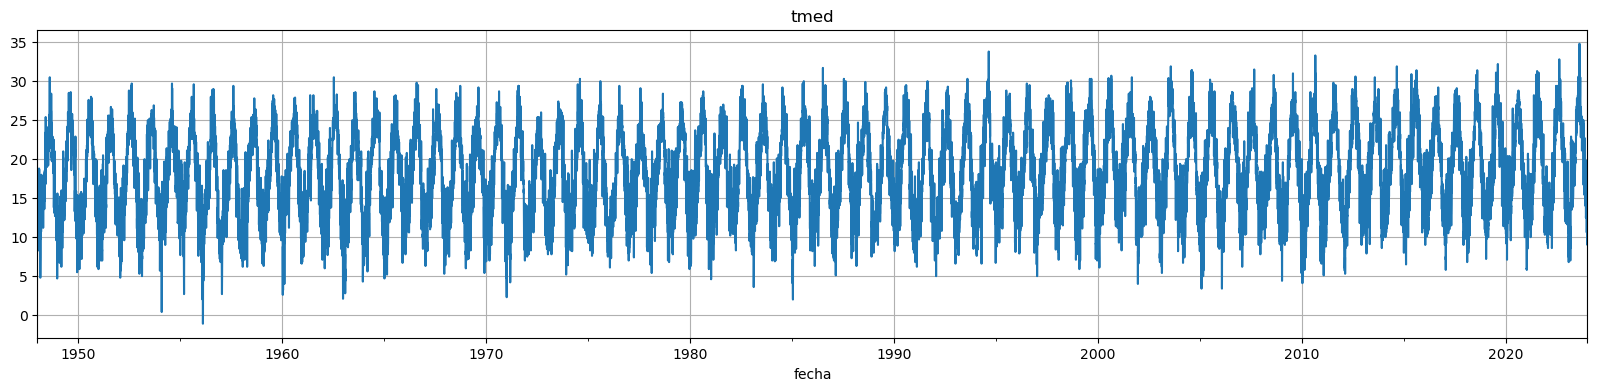

El valor máximo es 34.8
El valor mínimo es -1.1


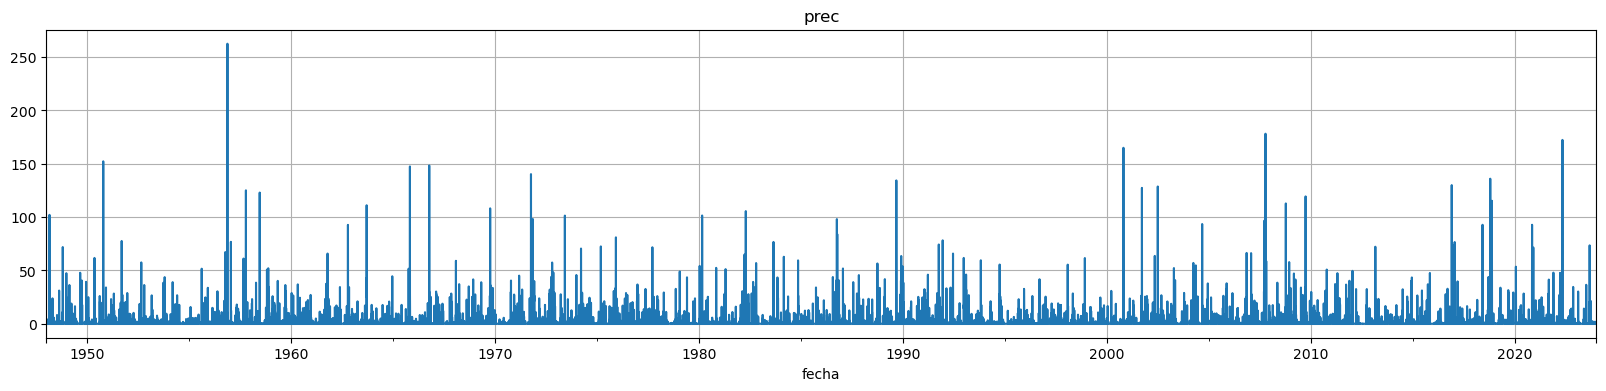

El valor máximo es 262.6
El valor mínimo es 0.0


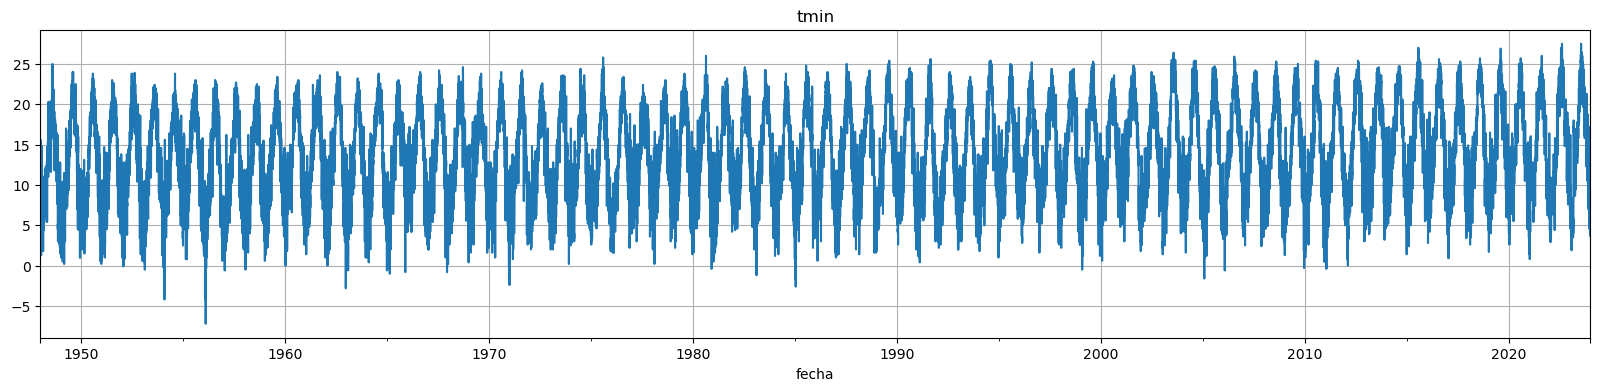

El valor máximo es 27.5
El valor mínimo es -7.2


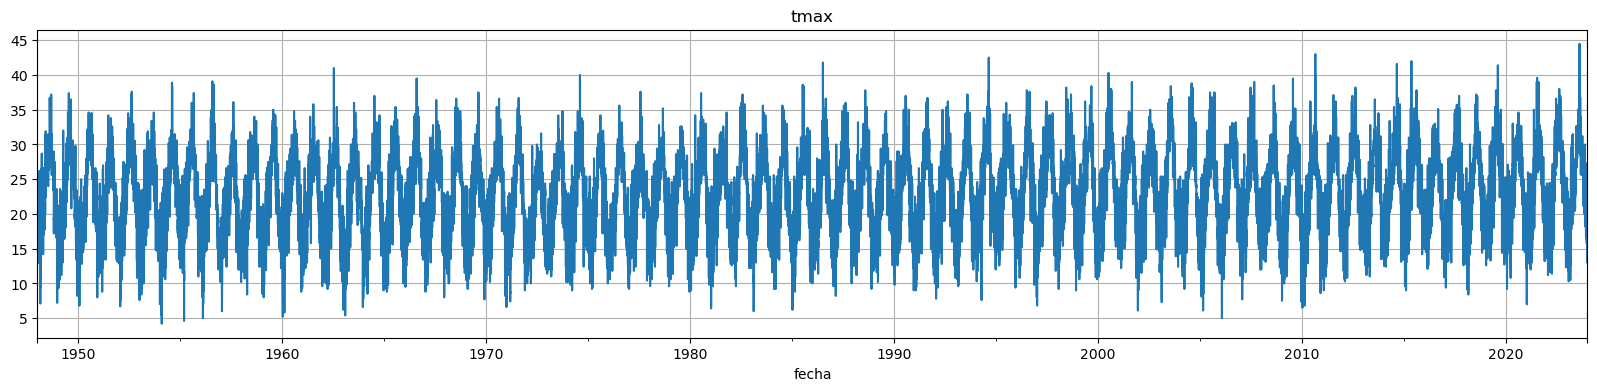

El valor máximo es 44.5
El valor mínimo es 4.2


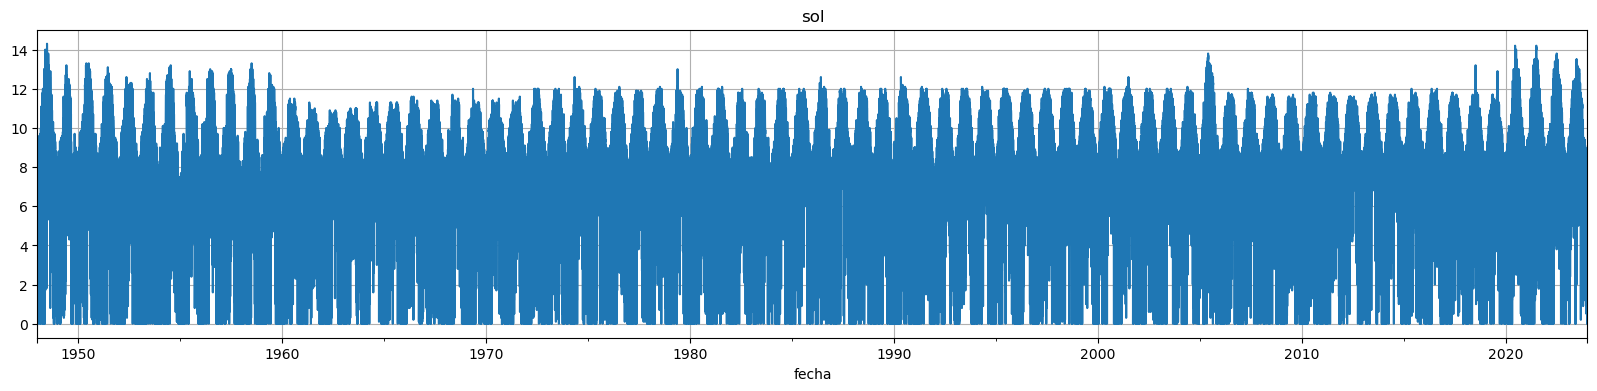

El valor máximo es 14.3
El valor mínimo es 0.0


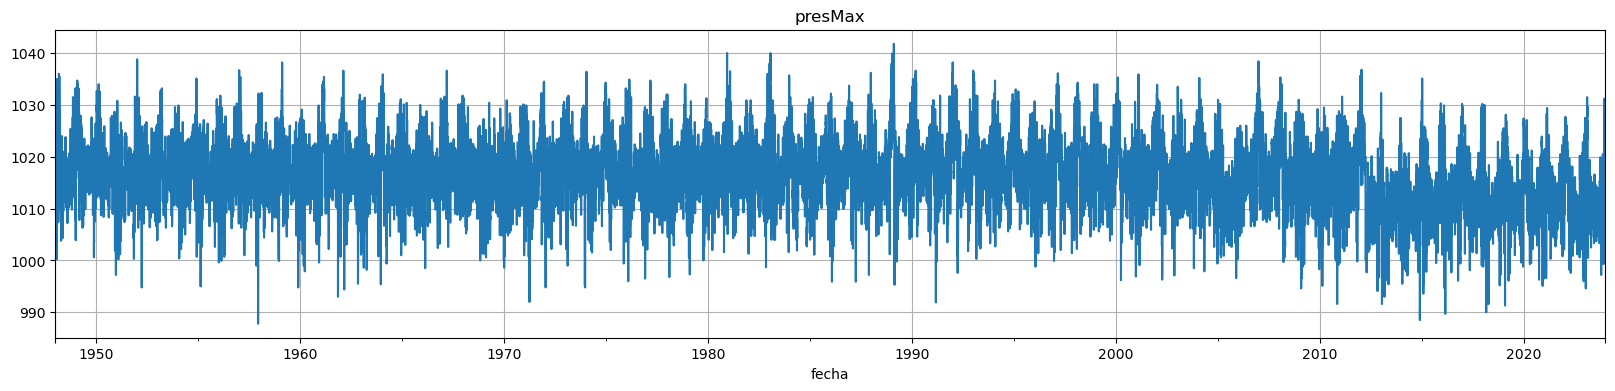

El valor máximo es 1041.8
El valor mínimo es 987.8


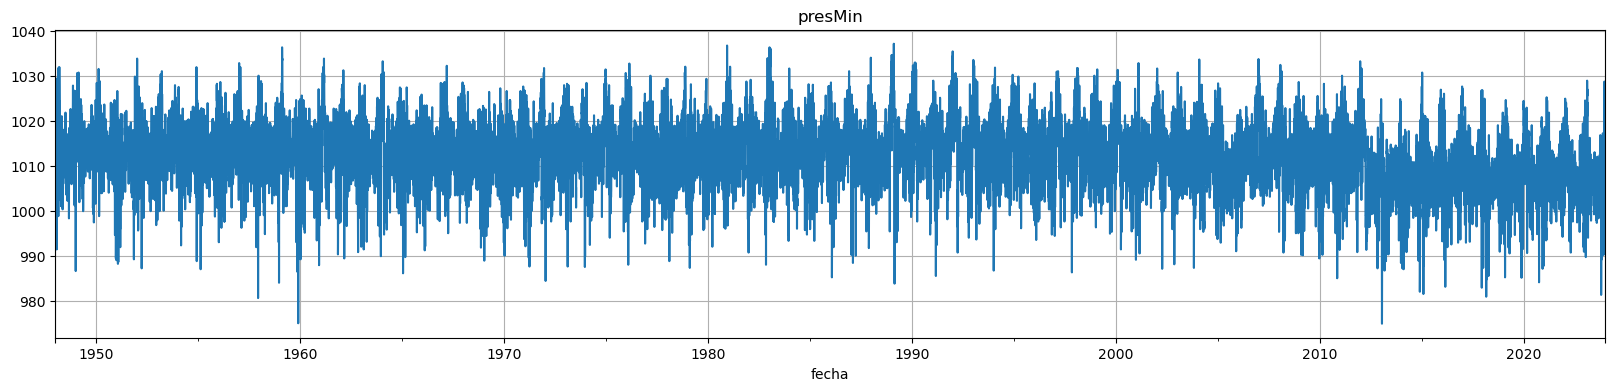

El valor máximo es 1037.1
El valor mínimo es 974.9


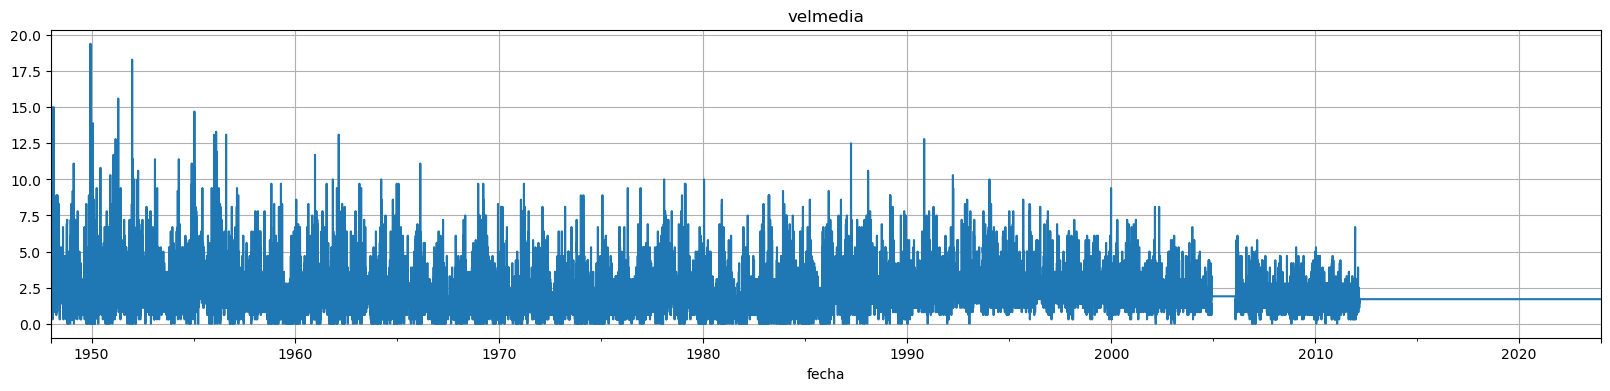

El valor máximo es 19.4
El valor mínimo es 0.0


In [61]:
# Comprobamos gráficamente la evolución de las columnas
for col in v.columns:
    v[col].plot(figsize=(20, 4))
    plt.title(f'{col}')
    plt.grid(True)
    plt.show()
    print(f'El valor máximo es {v[col].max()}')
    print(f'El valor mínimo es {v[col].min()}')

En la siguiente celda se encuentra el código que muestra las ocasiones que se describen en la celda contigua de ***'Explicación gráficos'***

In [62]:
# Temperaturas superiores a los 40º
# v.loc[v['tmax'] >= 40]

# Temperaturas inferiores a -1º
# v.loc[v['tmin'] < -1]

# Ejemplo de inundaciones
# v.loc[(v['prec'] > 110) & (v['presMin'] < 1000)]

#### Explicación gráficos:
Los gráficos sobre temperaturas ('tmed', 'tmin' y 'tmax') nos muestran como las temperaturas han ido subiendo poco a poco de forma continuada desde los años 50 hasta nuestros días.
Desde el 2000 al 2024, en 24 años:
 - ***'tmax':*** se observan 7 ocasiones en las que la temperatura ha superado los 40º. Mientras que entre el año 1948 y 1999, durante más de 50 años, solo se han registrado 4 ocasiones con una temperatura superior a 40º.
 - ***'tmin':*** se observan 2 cocasiones con una temperatura inferior a -1º. Previamente, entre 1948 y 1999, nos encontramos con 23 ocasiones en las que la temperatura ha sido inferior a -1º.

Las precipitaciones ('prec') y las presiones ('presMin' y 'presMax') entrarían en valoración si tuviéramos valores en tramos horarios más concretos. Puesto que un cambio en el valor de las precipitaciones y/o de las presiones en un espacio corto de tiempo puede generar inundaciones, lo que se conoce como gota fría.

Con respecto a la variable 'velmedia', se observa que tiene una tendencia descendente. Podemos explicar este descenso continuad debido a la acción del hombre al entorpecer el apso del viento mediante edificaciones. Esto se aprecia un poco mejor en los gráficos de Alicante que siguen a este de Vaslencia.

In [63]:
# Eliminamos la variable viento
v = v.drop(columns=('velmedia'))

Pensamos que podemos encontrar información útil en datos anuales. Esto lo realizaremos en una libreta específica en la que realizaremos más cálculos.

Generamos para cada columna un histograma, que nos permita ver la moda, y un diagrama de caja, que nos permita comprobar los valores atípicos.

Esto nos permite visualizar cuándo nos encontramos en una situación normal y cuándo nos encontramos ante un suceso extraordinario. Lo más importante es que este tipo de gráficas nos muestran de forma agradable la distribución de los datos. Esto nos permite entender la situación normal de esta localizacón.

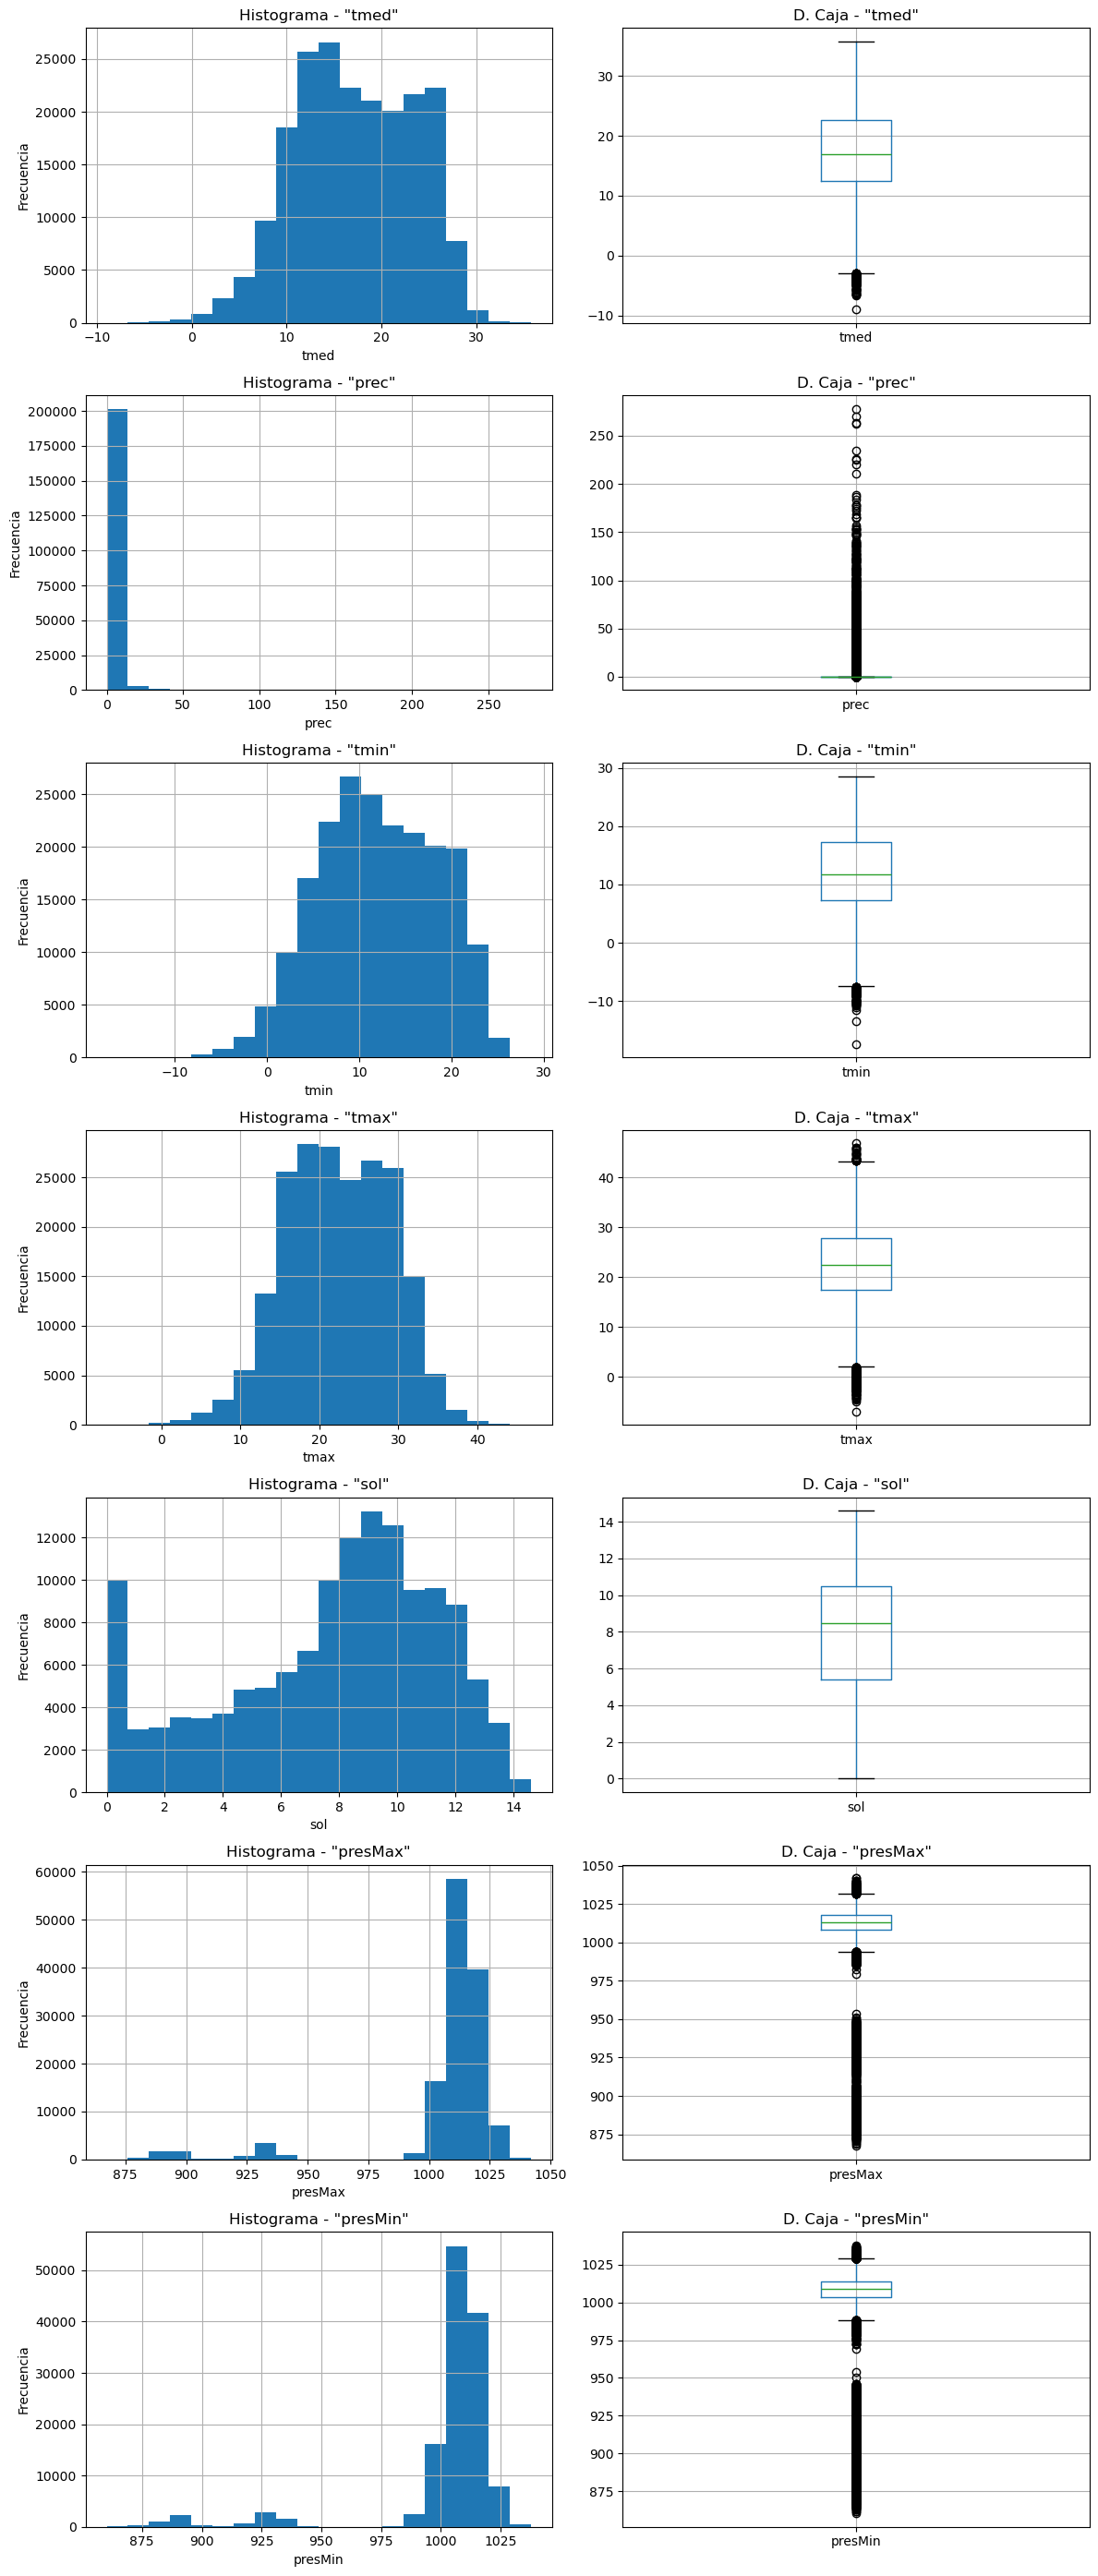

In [64]:
# Guardamos en una variable el número de filas
n_rows = len(v.columns)

# Indicamos el tamaño de los gráficos
plt.figure(figsize=(12, 4 * n_rows))

# Generamos un histograma y diagrama de caja para cada columna
for i, col in enumerate(v.columns):
    
    # Histograma
    plt.subplot(n_rows, 2, 2*i + 1)
    df[col].hist(bins=20)
    plt.title(f'Histograma - "{col}"')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    # Diagrama de caja
    plt.subplot(n_rows, 2, 2*i + 2)
    df.boxplot(column=[col])
    plt.title(f'D. Caja - "{col}"')

plt.tight_layout()
plt.show()

In [65]:
v.to_csv('valencia_clean.csv')

# Alicante

Comprobamos las correlaciones entre los dispositivos que tenemos en 'Alicante'

In [66]:
# Realizamos filtro por 'provincia'
nombres_alicante = df.loc[df['provincia'] == 'ALICANTE', 'nombre']

# Comprobamos valores únicos en 'nombre'
nombres_a = nombres_alicante.unique()
nombres_a

<StringArray>
[         'ALACANT/ALICANTE', 'ALICANTE-ELCHE AEROPUERTO',
              'JÁVEA/ XÀBIA',           'EL PINÓS/PINOSO']
Length: 4, dtype: string

In [67]:
a.isnull().sum()

nombre         0
provincia      0
altitud        0
tmed           9
prec           1
tmin           8
tmax           8
sol           68
presMax      213
presMin      214
velmedia      36
dtype: int64

Ahora se comprobará la correlación entre los datos de las columnas del dispositivo de 'Alicante' con el resto para comprobar con cuál sustituir cada columna

In [68]:
# Inicializamos un diccionario para guardar los resultados de la correlación
corr_aaero = {}

# Iteramos sobre las columnas de uno de los DataFrames
for columna in a.columns:
    if columna in a_aero.columns:
        # Convertimos las columnas a numérico, ignorando los errores para manejar valores no numéricos
        col_a = pd.to_numeric(a[columna], errors='coerce')
        col_aaero = pd.to_numeric(a_aero[columna], errors='coerce')

        # Calculamos la correlación y la almacenamos en el diccionario
        correlacion = col_a.corr(col_aaero)
        corr_aaero[columna] = correlacion
corr_aaero

C:\Users\34610\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


{'nombre': nan,
 'provincia': nan,
 'altitud': nan,
 'tmed': 0.989098504577273,
 'prec': 0.7914329346693809,
 'tmin': 0.9792328712614006,
 'tmax': 0.981493043979214,
 'sol': 0.9563252378966159,
 'presMax': 0.9949289284596908,
 'presMin': 0.994100909131769,
 'velmedia': 0.7296891572520201}

In [69]:
# Inicializamos un diccionario para guardar los resultados de la correlación
corr_ja = {}

# Iteramos sobre las columnas de uno de los DataFrames
for columna in a.columns:
    if columna in ja.columns:
        # Convertimos las columnas a numérico, ignorando los errores para manejar valores no numéricos
        col_a = pd.to_numeric(a[columna], errors='coerce')
        col_ja = pd.to_numeric(ja[columna], errors='coerce')

        # Calculamos la correlación y la almacenamos en el diccionario
        correlacion = col_a.corr(col_ja)
        corr_ja[columna] = correlacion
corr_ja

C:\Users\34610\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


{'nombre': nan,
 'provincia': nan,
 'altitud': nan,
 'tmed': 0.9834956541520499,
 'prec': 0.46262998682731693,
 'tmin': 0.9651765180384595,
 'tmax': 0.9703400540471171,
 'sol': 0.8726991644934207,
 'presMax': 0.9943723862037678,
 'presMin': 0.9945349445725736,
 'velmedia': 0.4549216243376065}

In [70]:
# Inicializamos un diccionario para guardar los resultados de la correlación
corr_el_pi = {}

# Iteramos sobre las columnas de uno de los DataFrames
for columna in a.columns:
    if columna in el_pi.columns:
        # Convertimos las columnas a numérico, ignorando los errores para manejar valores no numéricos
        col_a = pd.to_numeric(a[columna], errors='coerce')
        col_el_pi = pd.to_numeric(el_pi[columna], errors='coerce')

        # Calculamos la correlación y la almacenamos en el diccionario
        correlacion = col_a.corr(col_el_pi)
        corr_el_pi[columna] = correlacion
corr_el_pi

C:\Users\34610\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


{'nombre': nan,
 'provincia': nan,
 'altitud': nan,
 'tmed': 0.972509726335548,
 'prec': 0.6188804080849162,
 'tmin': 0.9621091637573543,
 'tmax': 0.9421049742162153,
 'sol': nan,
 'presMax': nan,
 'presMin': nan,
 'velmedia': 0.5196402060112648}

Se observa que guarda la mayor correlación con sus datos con el DataFrame 'a_aereo'

In [71]:
# Autorrellenado de datos con 'a_aereo'
a = a.combine_first(a_aero)

Como seguimos teniendo datos faltantes los rellenaremos con el siguiente que tiene mayor correlación 'ja'

In [72]:
# Autorrellenado de datos con 'ja'
a = a.combine_first(ja)

In [73]:
a.isnull().sum()

nombre         0
provincia      0
altitud        0
tmed           2
prec           0
tmin           1
tmax           1
sol            1
presMax      205
presMin      205
velmedia       5
dtype: int64

Puesto que los datos que quedan por rellenar son muy pocos en comparación con la longitud del DataFrame los autorrellenamos con valores cercanos

In [74]:
a = a.ffill()

In [75]:
a.isnull().sum()

nombre       0
provincia    0
altitud      0
tmed         0
prec         0
tmin         0
tmax         0
sol          0
presMax      0
presMin      0
velmedia     0
dtype: int64

In [76]:
# Eliminamos las columnas no numéricas
a = a.drop(columns=['altitud', 'nombre', 'provincia'])

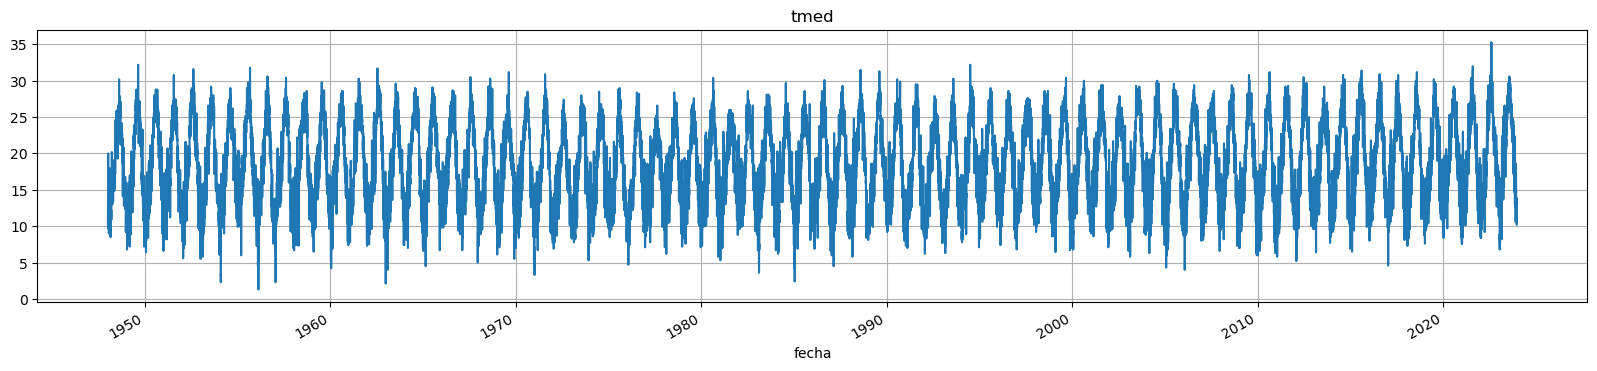

El valor máximo es 35.3
El valor mínimo es 1.3


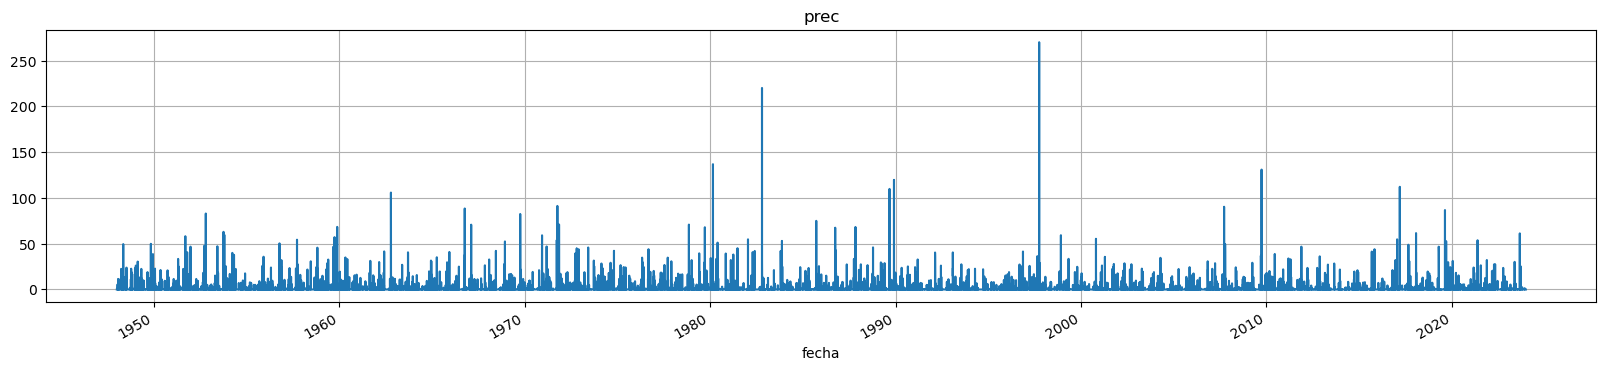

El valor máximo es 270.2
El valor mínimo es 0.0


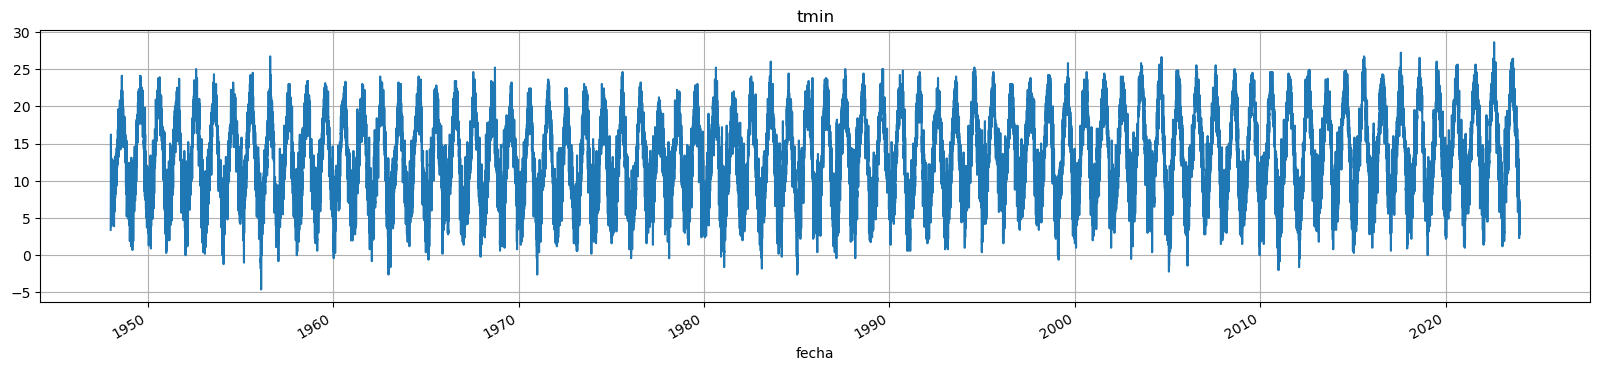

El valor máximo es 28.6
El valor mínimo es -4.6


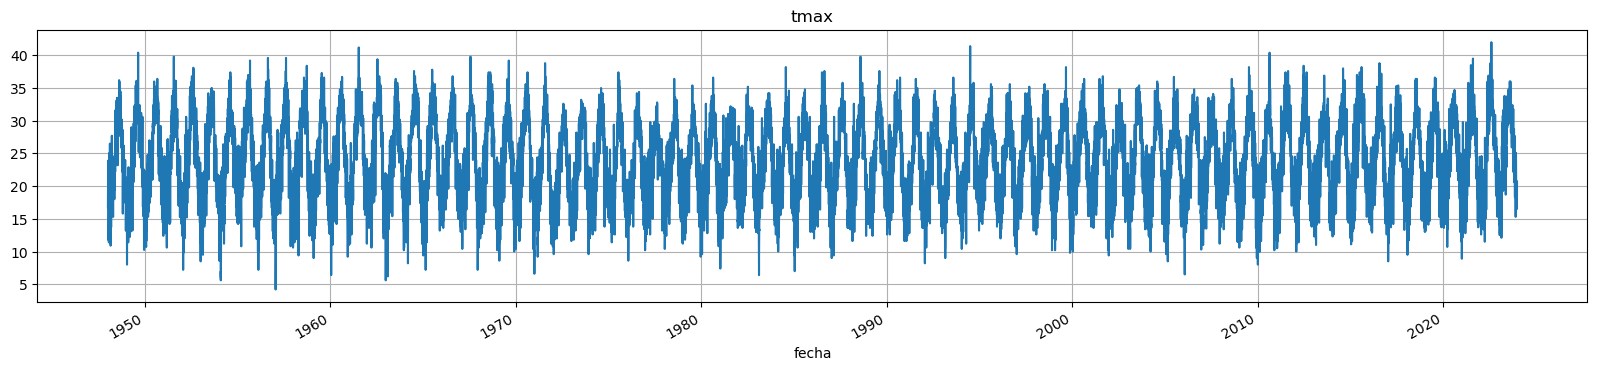

El valor máximo es 42.0
El valor mínimo es 4.2


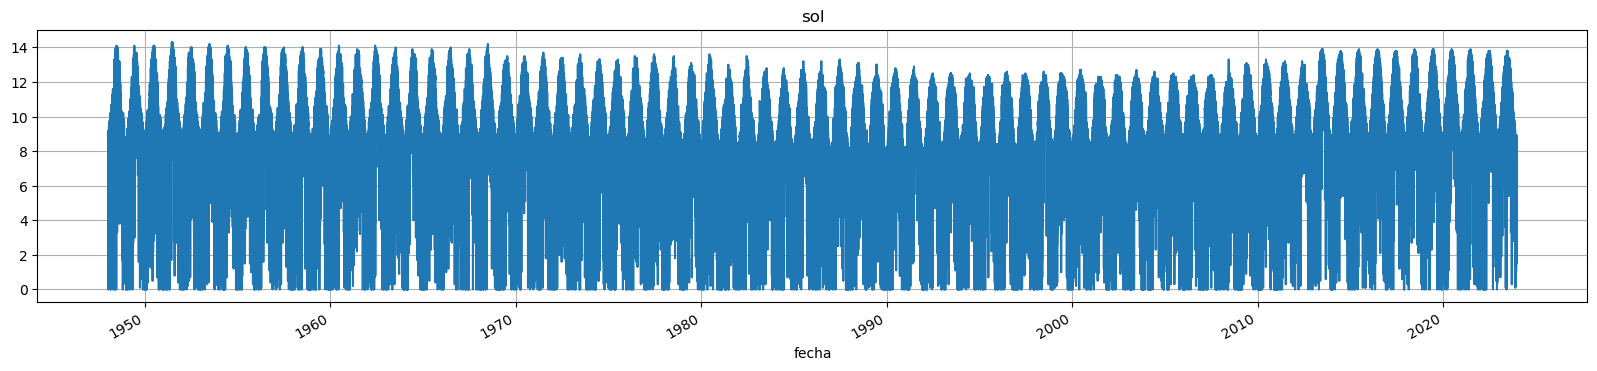

El valor máximo es 14.3
El valor mínimo es 0.0


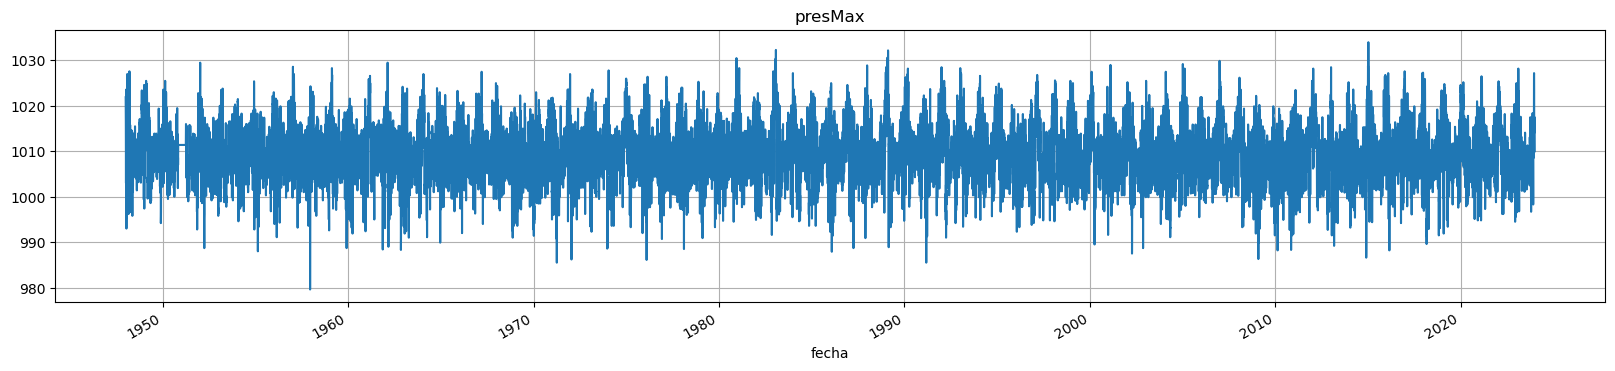

El valor máximo es 1034.0
El valor mínimo es 979.6


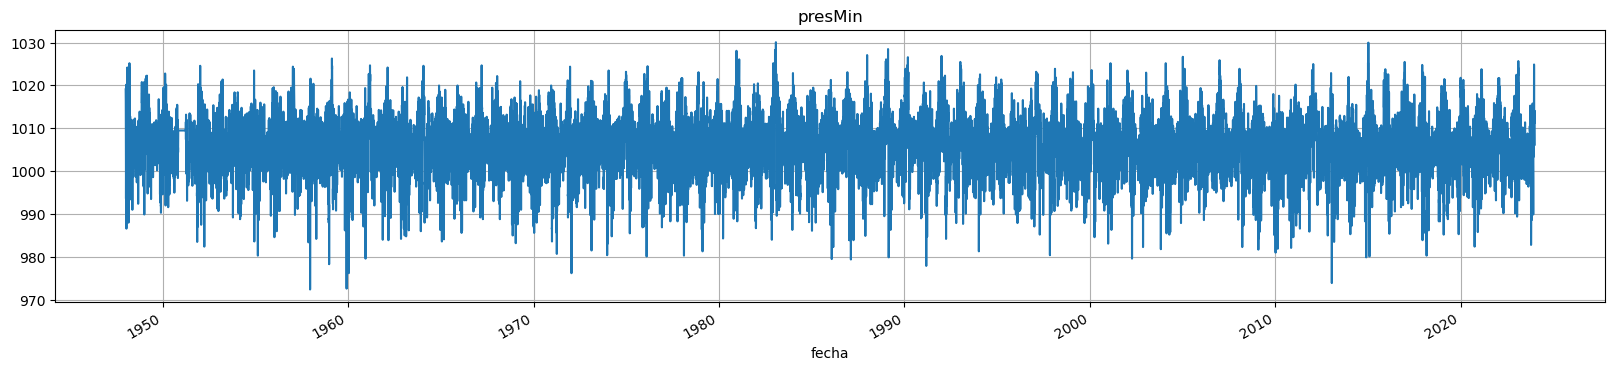

El valor máximo es 1030.1
El valor mínimo es 972.4


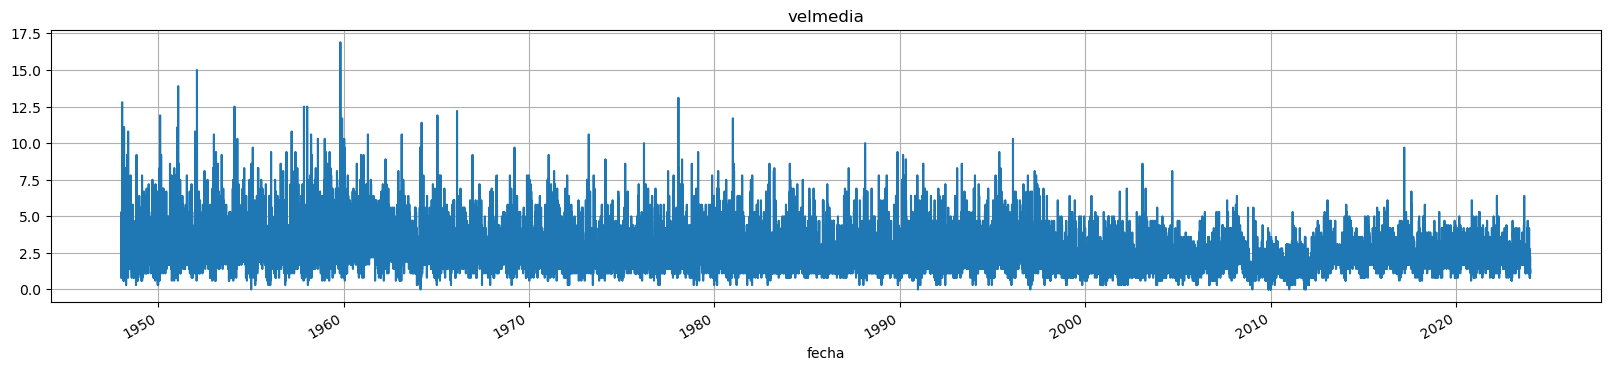

El valor máximo es 16.9
El valor mínimo es 0.0


In [77]:
for col in a.columns:
    a[col].plot(figsize=(20, 4))
    plt.title(f'{col}')
    plt.grid(True)
    plt.show()
    print(f'El valor máximo es {a[col].max()}')
    print(f'El valor mínimo es {a[col].min()}')

En la siguiente celda se encuentra el código que muestra las ocasiones que se describen en la celda contigua de 'Explicación gráficos'

In [78]:
# Temperaturas superiores a los 40º
# a.loc[a['tmax'] >= 40]

# Temperaturas inferiores a -1º
# a.loc[a['tmin'] < -1]

# Ejemplo de inundaciones
# a.loc[(v['prec'] > 90) & (a['presMin'] < 995)]

#### Explicación gráficos:
Los gráficos sobre temperaturas ('tmed', 'tmin' y 'tmax') nos muestran como las temperaturas han ido subiendo poco a poco de forma continuada desde los años 50 hasta nuestros días.
Desde el 2000 al 2024, en 24 años:
 - ***'tmax':*** se observan 3 ocasiones en las que la temperatura ha superado los 40º. Mientras que entre el año 1948 y 1999, durante más de 50 años, solo se han registrado 2 ocasiones con una temperatura superior a 40º.
 - ***'tmin':*** se observan 5 cocasiones con una temperatura inferior a -1º. Previamente, entre 1948 y 1999, nos encontramos con 15 ocasiones en las que la temperatura ha sido inferior a -1º.

Se observa que las temperaturas de Alicante son más suaves, es como si Alicante tuviera un microclima.

También hay que resaltar que, al igual que observamos en los datos de Valencia, la velocidad del viento disminuye con el apso del tiempo. La explicación a este descenso continuado la podemos encontrar en el aumento de las dedificaciones.

In [79]:
a = a.drop(columns=('velmedia'))

Generamos histogramas y diagramas de caja para cada columan

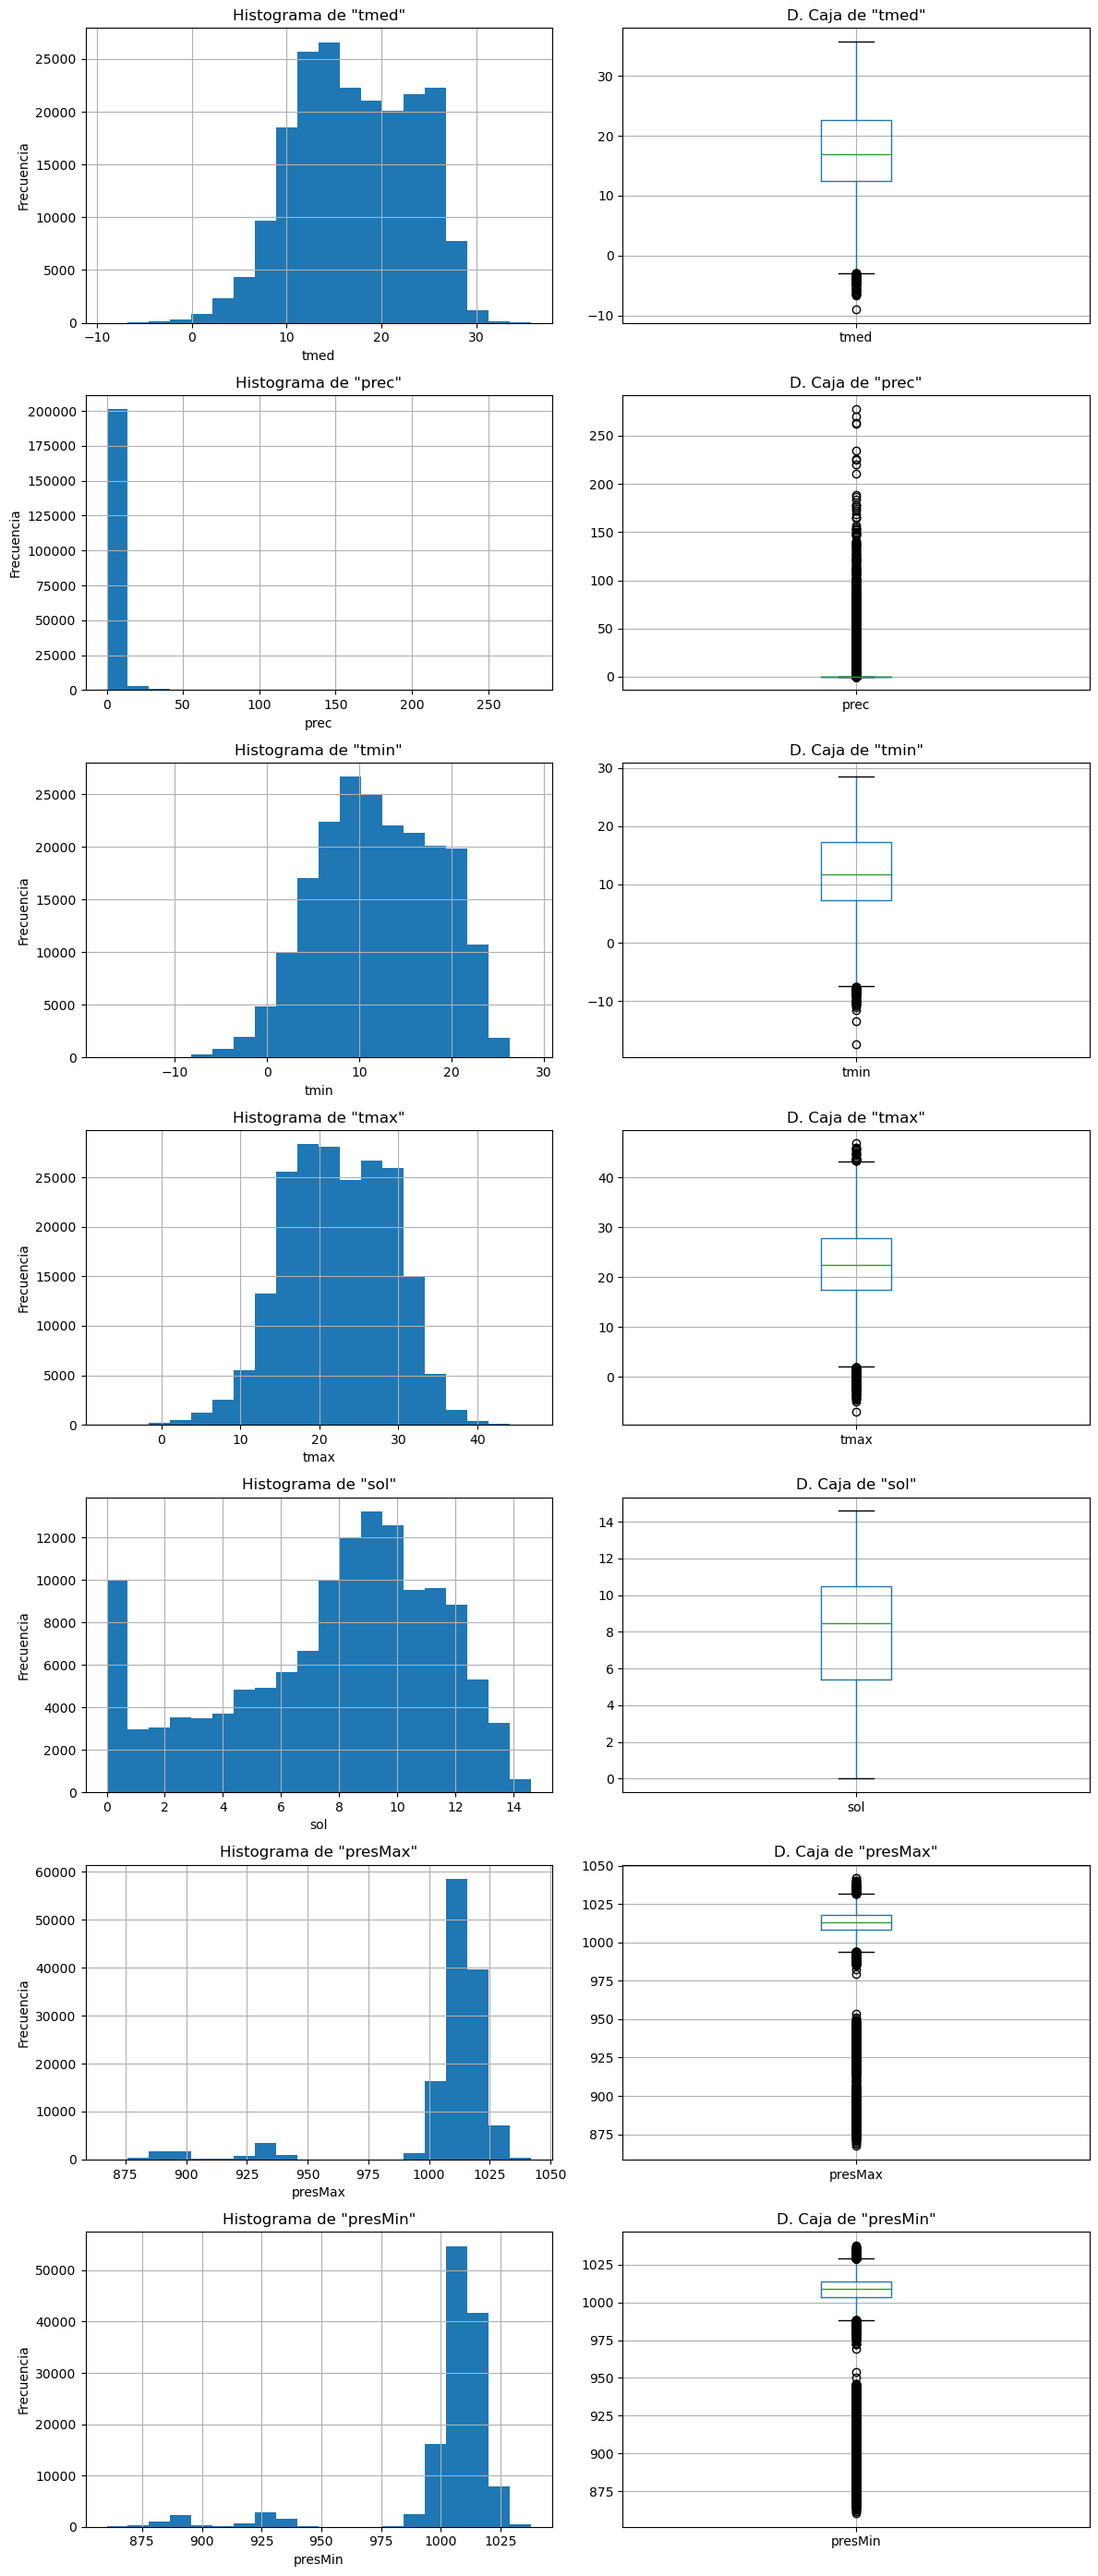

In [80]:
# Guardamos en una variable el número de filas
n_rows = len(a.columns)

# Indicamos el tamaño de los gráficos
plt.figure(figsize=(12, 4 * n_rows))

# Generamos un histograma y diagrama de caja para cada columna
for i, col in enumerate(a.columns):
    
    # Histograma
    plt.subplot(n_rows, 2, 2*i + 1)
    df[col].hist(bins=20)
    plt.title(f'Histograma de "{col}"')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    # Diagrama de caja
    plt.subplot(n_rows, 2, 2*i + 2)
    df.boxplot(column=[col])
    plt.title(f'D. Caja de "{col}"')

plt.tight_layout()
plt.show()

In [81]:
a.to_csv('alicante_clean.csv')

# Castellón

Comprobamos cuáles son los dispositivos de Castellón

In [82]:
nombres_castellon = df.loc[df['provincia'] == 'CASTELLON', 'nombre']
nombres_c = nombres_castellon.unique()
nombres_c

<StringArray>
[           'CASTELLÓ DE LA PLANA',            'CASTELLÓ - ALMASSORA',
                         'VINARÒS',                     'CASTELLFORT',
 'VILLAFRANCA DEL CID/VILLAFRANCA']
Length: 5, dtype: string

Al observar los dispositivos de Castellón comprobamos, mediante el código generado en las celdas de la 33 a la 48, sus datos cuentan con un historial inferior a 30 años.

Por lo que no son válidos para nuestro estudio.